## UTS PENGOLAHAN CITRA
## NAUFAL RAFI ALFIKRI
## 202131049

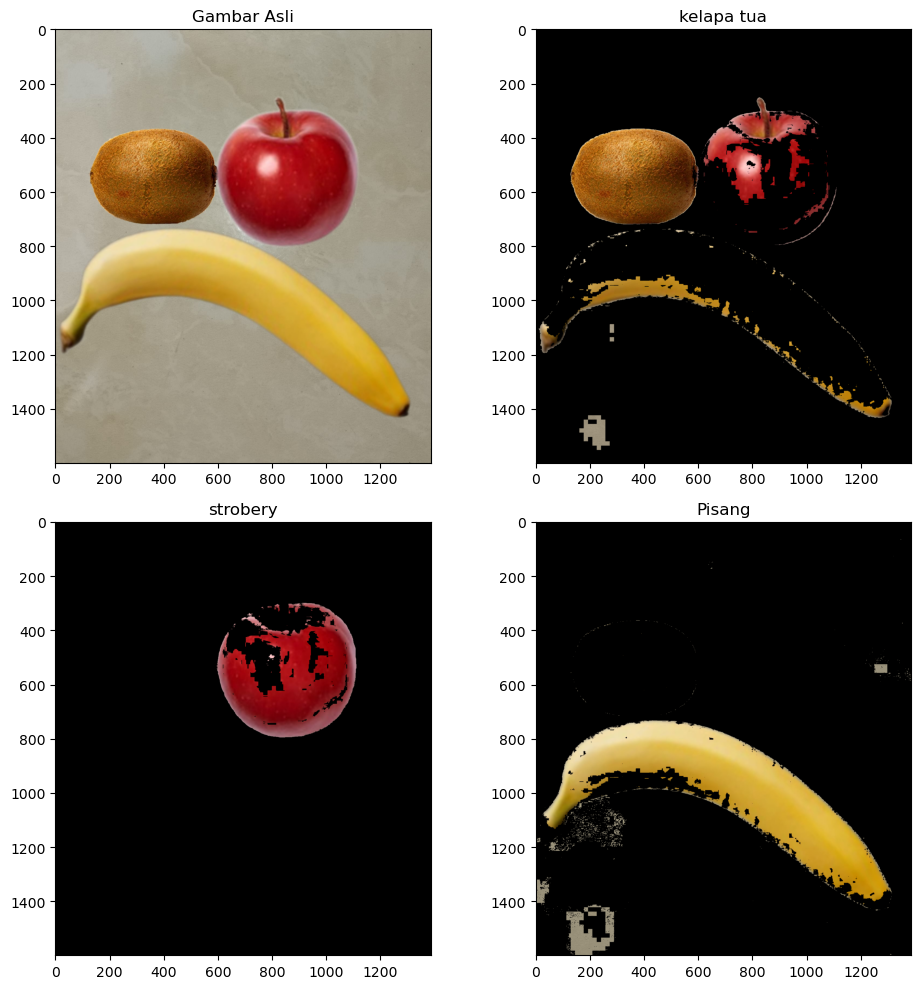

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('buah3.jpg')

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_brown = np.array([0, 50, 50])
upper_brown = np.array([20, 255, 255])

lower_red = np.array([160, 50, 50])
upper_red = np.array([179, 255, 255])

lower_yellow = np.array([21, 50, 50])  
upper_yellow = np.array([35, 255, 255])  

mask_brown = cv2.inRange(hsv_img, lower_brown, upper_brown)
mask_red = cv2.inRange(hsv_img, lower_red, upper_red)
mask_yellow = cv2.inRange(hsv_img, lower_yellow, upper_yellow)  

result_brown = cv2.bitwise_and(img, img, mask=mask_brown)
result_red = cv2.bitwise_and(img, img, mask=mask_red)
result_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)  

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask_brown = cv2.morphologyEx(mask_brown, cv2.MORPH_OPEN, kernel)
cleaned_mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)
cleaned_mask_yellow = cv2.morphologyEx(mask_yellow, cv2.MORPH_OPEN, kernel)  

contours_brown, _ = cv2.findContours(cleaned_mask_brown, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, _ = cv2.findContours(cleaned_mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_yellow, _ = cv2.findContours(cleaned_mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 


fig, axs = plt.subplots(2, 2, figsize=(10, 10)) 

axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Gambar Asli')

axs[0, 1].imshow(cv2.cvtColor(result_brown, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('kelapa tua')

axs[1, 0].imshow(cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('strobery')

axs[1, 1].imshow(cv2.cvtColor(result_yellow, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Pisang')

plt.tight_layout()

plt.show()
